#1 Author
Student Name: Pavan Kumar Gondabal Ramakrishna

Student ID: 230049961

## 2 Problem formulation

We have The images of various dishes from different cusines, having attributes such as Taste, healthiness, ingredients, likliness etc and a Csv file containing the attributes

Based on the features such as 'Ingredients','Diet','Home_or_restaurant', Likeness, we will be prediting the 'Healthiness_rating_int'of the Dish.

I have selected these featrues as they are importent features based on how each attribute plays a major role for the healthiness of a dish when compared to other attributes in general

1.0 being the lowest and 5.0 being the heighest Healthiness_rating_int

We can also consider the images but the attributes have all the relevant data on the images which can be used as features, we can directly use the CSV file to build our model. Image processing takes huge amount of comutation time and features of the images might sometimes wont be enough to build a classification model such as food classification for healthiness rating


In [ ]:
#Install the mlend library
!pip install mlend

#3 Machine Learning pipeline

The Csv file from ML end library is being used as an input for our pipe line ,use ['Ingredients','Diet','Home_or_restaurant','Healthiness_rating_int','Likeness'] as input features, encode the catagorical features into numbers, Ingredients have been cleaned and lemmatization is used for preprocessing and TF-IDF method is being implimented to find the importand ingredients and vectorize the ingredient features, after pre processing of input features, we have 1635 columns as input

We will mount the google colab to drive in order to acces the dataset

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#We will use The csv file which has the attributes

df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')


In [ ]:
df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [ ]:
df_sample= df[['Ingredients','Diet','Home_or_restaurant','Healthiness_rating_int','Likeness']]
#df_sample= df[['Ingredients','Home_or_restaurant','Healthiness_rating_int']]
#drop nan values
df_sample.dropna(inplace=True)

<ipython-input-260-c1fdb5ba319d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_sample

,Ingredients,Diet,Home_or_restaurant,Healthiness_rating_int,Likeness
filename,,,,,
000001.jpg,"rice,chicken_breast,spicy_curry_sauce",non_vegetarian,marugame_udon,3.0,like
000002.jpg,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",non_vegetarian,home,2.0,like
000003.jpg,"chili,chicken,peanuts,sihuan_peppercorns,green...",non_vegetarian,jinli_flagship_branch,3.0,strongly_like
000004.jpg,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",vegetarian,home,2.0,strongly_like
000005.jpg,"chicken,lemon,turmeric,garam_masala,coriander_...",non_vegetarian,home,4.0,strongly_like
...,...,...,...,...,...
003246.jpg,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",vegetarian,home,4.0,strongly_like
003247.jpg,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",vegetarian,home,4.0,strongly_like
003248.jpg,"potato,onion,peanut,salt,turmeric_powder,red_c...",vegetarian,home,1.0,like


In [ ]:
import pandas as pd


# Check if the string contains 'home' and update accordingly
df_sample['Home_or_restaurant'] = df_sample['Home_or_restaurant'].apply(lambda x: 'home' if 'home' in x else 'restaurant')

# Display the updated DataFrame
print(df_sample)


                                                  Ingredients            Diet  \
filename                                                                        
000001.jpg              rice,chicken_breast,spicy_curry_sauce  non_vegetarian   
000002.jpg  eggs,bacon,hash_brown,tomato,bread,tomato,bake...  non_vegetarian   
000003.jpg  chili,chicken,peanuts,sihuan_peppercorns,green...  non_vegetarian   
000004.jpg      sugar,water,khoya,milk,salt,oil,cardamon,ghee      vegetarian   
000005.jpg  chicken,lemon,turmeric,garam_masala,coriander_...  non_vegetarian   
...                                                       ...             ...   
003246.jpg  1_cup_basmati_rice,2_cups_water,2_tablespoons_...      vegetarian   
003247.jpg  fried_cottage_cheese,ghee,lentils,milk,wheat_f...      vegetarian   
003248.jpg  potato,onion,peanut,salt,turmeric_powder,red_c...      vegetarian   
003249.jpg                             kiwi,banana,apple,milk           vegan   
003250.jpg   beef_patty,brea

<ipython-input-262-9c8ea5df76ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



# Combine categorical features and ingredients
X_text = df_sample['Ingredients'].str.replace(',', ' ')
X_cat = pd.get_dummies(df_sample[['Diet', 'Home_or_restaurant','Likeness']], drop_first=True)
#X_cat = pd.get_dummies(df_sample[[ 'Home_or_restaurant']], drop_first=True)

X = pd.concat([X_text, X_cat], axis=1)
#X['Likeness_int'] = df_sample['Likeness_int']
y = df_sample['Healthiness_rating_int']


In [ ]:
X

,Ingredients,Diet_vegan,Diet_vegetarian,Home_or_restaurant_restaurant,Likeness_like,Likeness_neutral,Likeness_strongly_dislike,Likeness_strongly_like
filename,,,,,,,,
000001.jpg,rice chicken_breast spicy_curry_sauce,0,0,1,1,0,0,0
000002.jpg,eggs bacon hash_brown tomato bread tomato bake...,0,0,0,1,0,0,0
000003.jpg,chili chicken peanuts sihuan_peppercorns green...,0,0,1,0,0,0,1
000004.jpg,sugar water khoya milk salt oil cardamon ghee,0,1,0,0,0,0,1
000005.jpg,chicken lemon turmeric garam_masala coriander_...,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
003246.jpg,1_cup_basmati_rice 2_cups_water 2_tablespoons_...,0,1,0,0,0,0,1
003247.jpg,fried_cottage_cheese ghee lentils milk wheat_f...,0,1,0,0,0,0,1
003248.jpg,potato onion peanut salt turmeric_powder red_c...,0,1,0,1,0,0,0


In [ ]:
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Define a function to remove stop words


# Apply the functions to the 'Ingredients' column
X['Ingredients'] = X['Ingredients'].str.replace(r'\d+', '')  # Remove digits
 # Remove special characters


<ipython-input-265-461d48531b6e>:8: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#X['Ingredients'] = X['Ingredients'].str.replace(r'\d+', '')  # Remove numbers
X['Ingredients'] = X['Ingredients'].str.replace('_', ' ')  # Replace underscores with spaces
X['Ingredients'] = X['Ingredients'].apply(remove_special_characters)
# Remove common words and exclude non-food ingredients
non_food_words = ['cups','cup','glass','water','cook','glasses','all','allpurpose', 'spoon','teaspoon','add','adjust','boil','heat','about','tablespoon','tablespoons','acid',  'acidity', 'agent','powder','paste','chopped','finely']  # Add more non-food words as needed



In [ ]:
X['Ingredients']

filename
000001.jpg                rice chicken breast spicy curry sauce
000002.jpg    eggs bacon hash brown tomato bread tomato bake...
000003.jpg    chili chicken peanuts sihuan peppercorns green...
000004.jpg        sugar water khoya milk salt oil cardamon ghee
000005.jpg    chicken lemon turmeric garam masala coriander ...
                                    ...                        
003246.jpg     cup basmati rice  cups water  tablespoons ghe...
003247.jpg    fried cottage cheese ghee lentils milk wheat f...
003248.jpg    potato onion peanut salt turmeric powder red c...
003249.jpg                               kiwi banana apple milk
003250.jpg     beef patty bread roll cherry tomato  onion chive
Name: Ingredients, Length: 3246, dtype: object

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Function to lemmatize a sentence
def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Lemmatize each word, excluding stop words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]

    # Join the lemmatized words back into a sentence
    lemmatized_sentence = ' '.join(lemmatized_words)

    return lemmatized_sentence

# Apply lemmatization to the entire column
X['Ingredients'] = X['Ingredients'].apply(lemmatize_sentence)

# Display the DataFrame
print(X)

                                                  Ingredients  Diet_vegan  \
filename                                                                    
000001.jpg              rice chicken breast spicy curry sauce           0   
000002.jpg  egg bacon hash brown tomato bread tomato baked...           0   
000003.jpg  chili chicken peanut sihuan peppercorn green o...           0   
000004.jpg      sugar water khoya milk salt oil cardamon ghee           0   
000005.jpg  chicken lemon turmeric garam masala coriander ...           0   
...                                                       ...         ...   
003246.jpg  cup basmati rice cup water tablespoon ghee tea...           0   
003247.jpg  fried cottage cheese ghee lentil milk wheat fl...           0   
003248.jpg  potato onion peanut salt turmeric powder red c...           0   
003249.jpg                             kiwi banana apple milk           1   
003250.jpg    beef patty bread roll cherry tomato onion chive           0   

In [ ]:
X['Ingredients'] = X['Ingredients'].apply(lambda x: ' '.join(word for word in x.split() if word not in non_food_words))

# Split words and tokenize
X['Ingredients'] = X['Ingredients'].apply(lambda x: ' '.join(x.split()))



In [ ]:
for i in X['Ingredients']:
  print(i)

In [ ]:
vectorizer = TfidfVectorizer()

ingredients_encoded = vectorizer.fit_transform(X['Ingredients'])

# Convert the encoded features to a DataFrame



In [ ]:
ingredients_encoded

<3246x1627 sparse matrix of type '<class 'numpy.float64'>'
	with 31059 stored elements in Compressed Sparse Row format>

In [ ]:
df_encoded = pd.DataFrame(ingredients_encoded.toarray(), columns=vectorizer.get_feature_names_out())




# Concatenate the original DataFrame with the encoded features
X1 = pd.concat([X.reset_index(drop=True), df_encoded], axis=1)
X1.set_index(X.index, inplace=True)
# Display the updated DataFrame
print(X1)

                                                  Ingredients  Diet_vegan  \
filename                                                                    
000001.jpg              rice chicken breast spicy curry sauce           0   
000002.jpg  egg bacon hash brown tomato bread tomato baked...           0   
000003.jpg  chili chicken peanut sihuan peppercorn green o...           0   
000004.jpg            sugar khoya milk salt oil cardamon ghee           0   
000005.jpg  chicken lemon turmeric garam masala coriander ...           0   
...                                                       ...         ...   
003246.jpg  basmati rice ghee cumin seed zeera green carda...           0   
003247.jpg  fried cottage cheese ghee lentil milk wheat fl...           0   
003248.jpg  potato onion peanut salt turmeric red chilli c...           0   
003249.jpg                             kiwi banana apple milk           1   
003250.jpg    beef patty bread roll cherry tomato onion chive           0   

In [ ]:
new_dataframe = X1.iloc[:, 2:].copy()

In [ ]:
new_dataframe

,Diet_vegetarian,Home_or_restaurant_restaurant,Likeness_like,Likeness_neutral,Likeness_strongly_dislike,Likeness_strongly_like,adai,aioli,ajikiku,ajjinomotto,...,yogurt,yolk,yorkshire,yougurt,youre,yuba,yukon,zeera,zest,zucchini
filename,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
000002.jpg,0,0,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
000003.jpg,0,1,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
000004.jpg,1,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
000005.jpg,0,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,1,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419478,0.0,0.0
003247.jpg,1,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
003248.jpg,1,0,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# 4 Transformation stage

 we will use random forest classfier to reduce the dimentions of the features by keeping the improtent feature threshold to 0.01, which will eliminate the remaining features from 1633 columns, we will identify 22 columns

In [ ]:
# Assuming X is your DataFrame
from sklearn.ensemble import RandomForestClassifier

# Fit a RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(new_dataframe, y)  # Replace 'y' with your target variable

# Get feature importances
feature_importances = rf.feature_importances_

# Select top features based on importance scores
threshold = 0.01
selected_features = new_dataframe.columns[feature_importances > threshold]

# Apply the selection to the DataFrame
X_selected = new_dataframe[selected_features]


In [ ]:
X_selected

,Diet_vegetarian,Home_or_restaurant_restaurant,Likeness_like,Likeness_strongly_like,bread,butter,cheese,chicken,chilli,egg,...,green,oil,onion,pepper,potato,rice,salt,sauce,spice,tomato
filename,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0.000000,0.0,0.000000,0.255063,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.251254,0.000000,0.293803,0.0,0.000000
000002.jpg,0,0,1,0,0.244222,0.0,0.000000,0.000000,0.000000,0.210678,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.319704
000003.jpg,0,1,0,1,0.000000,0.0,0.000000,0.158534,0.000000,0.000000,...,0.187837,0.122322,0.128109,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
000004.jpg,1,0,0,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150538,0.000000,0.0,0.000000,0.000000,0.156286,0.000000,0.0,0.000000
000005.jpg,0,0,0,1,0.000000,0.0,0.000000,0.283216,0.000000,0.000000,...,0.000000,0.000000,0.228862,0.0,0.000000,0.000000,0.226869,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,1,0,0,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.146483,0.000000,0.000000,0.0,0.000000,0.121785,0.099034,0.000000,0.0,0.000000
003247.jpg,1,0,0,1,0.000000,0.0,0.222189,0.000000,0.368509,0.000000,...,0.211134,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
003248.jpg,1,0,1,0,0.000000,0.0,0.000000,0.000000,0.387578,0.000000,...,0.222059,0.144608,0.151449,0.0,0.227218,0.000000,0.150130,0.000000,0.0,0.000000


#5 Modelling

We will be using ensabling technique and grid search to find best parameters and models among, random forest, SVC and logistic regression, as all these models are well known for classification problem.

#6 Methodology

We will be using 80:20 split on the entire datset for train and test data, the models will be trained on the train dataset using various classification models below
Based on the Accuracy score on train and test dataset, the model will also be assed on Confusion matrix ,Precision, recall etc.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the model (Random Forest Classifier in this example)
model = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Accuracy: 0.4123076923076923
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        30
         2.0       0.29      0.19      0.23        98
         3.0       0.26      0.19      0.22       148
         4.0       0.46      0.78      0.58       247
         5.0       0.49      0.22      0.30       127

    accuracy                           0.41       650
   macro avg       0.30      0.28      0.27       650
weighted avg       0.37      0.41      0.36       650

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


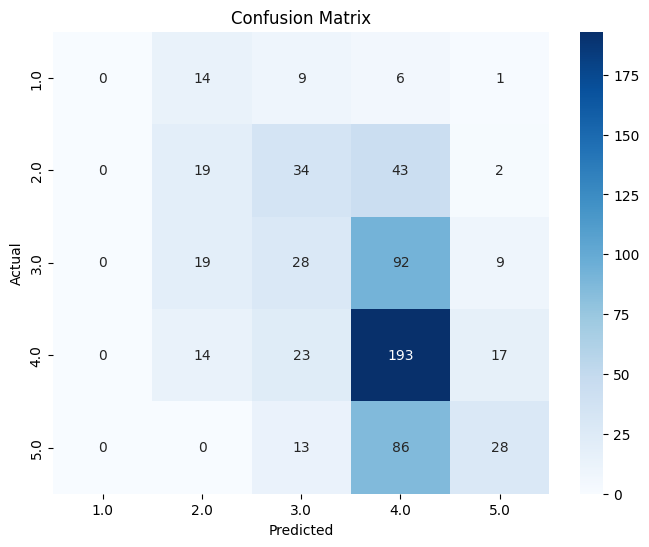

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Print classification report
#print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the model (Logistic Regression in this example)
model = LogisticRegression()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear'],  # Solver for optimization problem
}

# Define the stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Accuracy: 0.4
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        30
         2.0       0.25      0.13      0.17        98
         3.0       0.33      0.21      0.26       148
         4.0       0.43      0.82      0.56       247
         5.0       0.39      0.10      0.16       127

    accuracy                           0.40       650
   macro avg       0.28      0.25      0.23       650
weighted avg       0.35      0.40      0.33       650

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the model (Support Vector Machine - SVM in this example)
model = SVC()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel (if 'poly' is chosen)
}

# Define the stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Accuracy: 0.42
Classification Report:
              precision    recall  f1-score   support

         1.0       0.33      0.03      0.06        30
         2.0       0.32      0.18      0.23        98
         3.0       0.39      0.24      0.30       148
         4.0       0.43      0.80      0.56       247
         5.0       0.50      0.17      0.26       127

    accuracy                           0.42       650
   macro avg       0.39      0.28      0.28       650
weighted avg       0.41      0.42      0.37       650

Best Hyperparameters: {'C': 10, 'degree': 2, 'kernel': 'poly'}


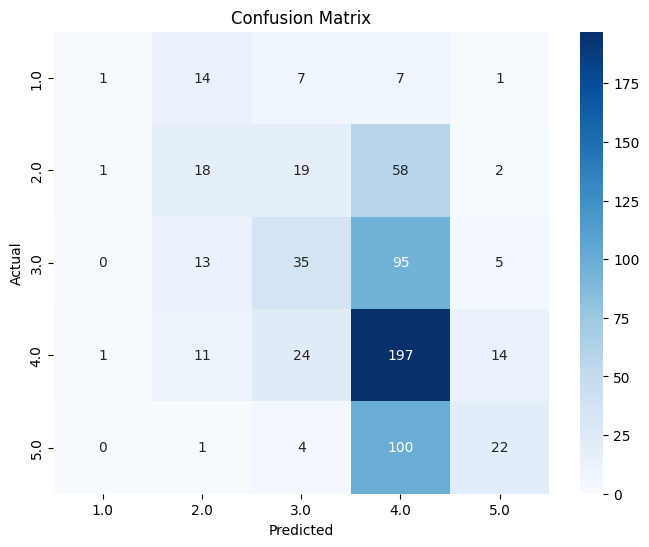

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#7 Dataset
Test data is used to make the predictions, we will use one of the sample data to make our predictions, below is the corelation matrix of the extracted featrues

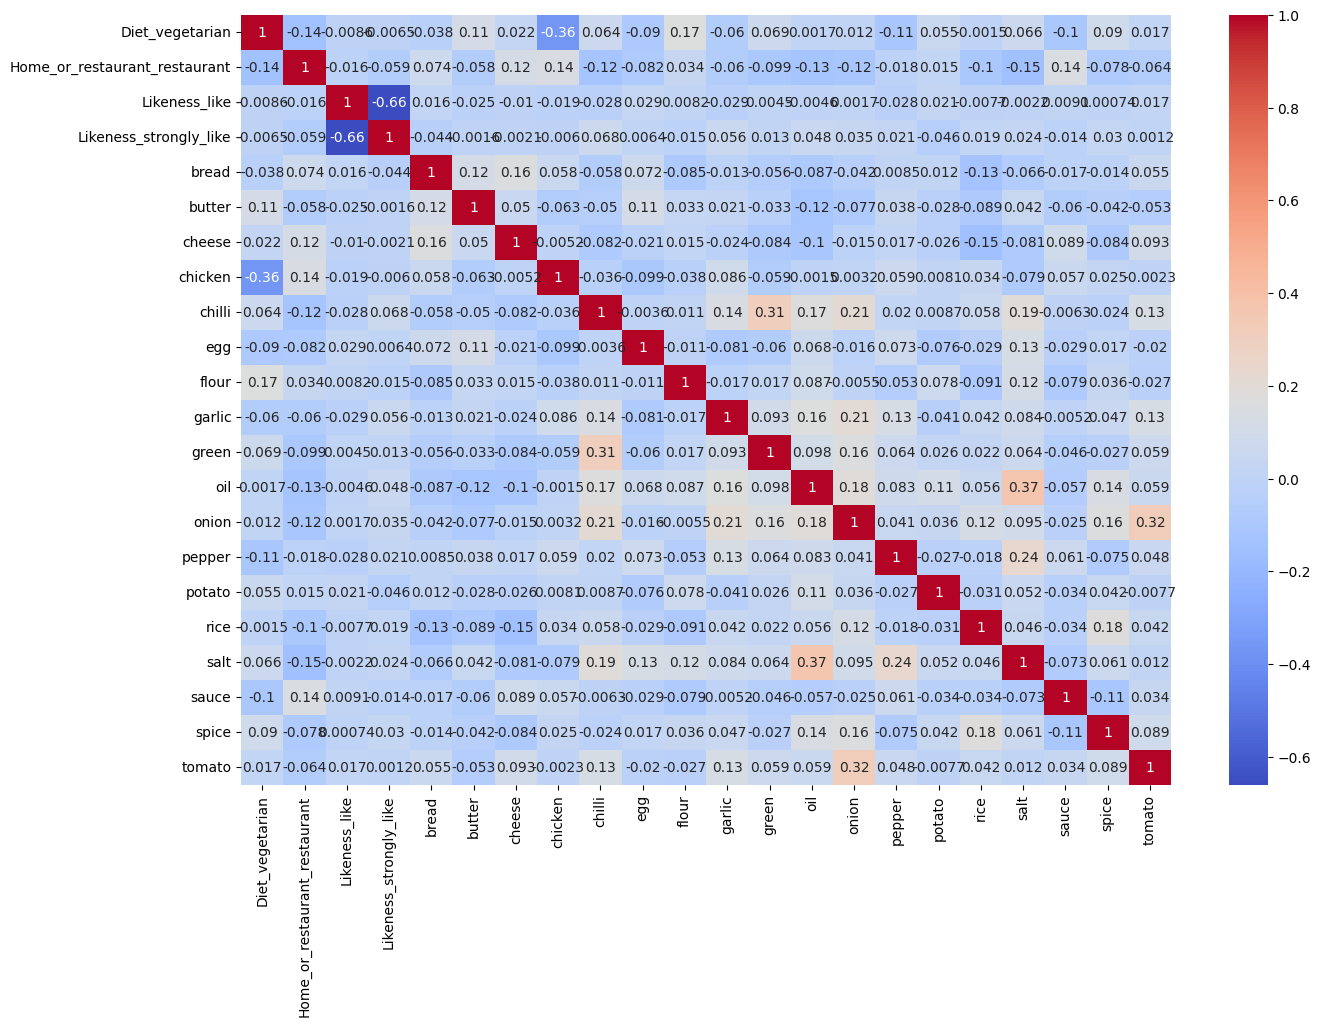

In [ ]:
X_selected_matrix = X_selected.corr()

# Create the heatmap using the `heatmap` function of Seaborn
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(X_selected_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

In [ ]:
first_row = X_test.head(1)

# Display the first row
print("First Row of DataFrame:")
first_row

First Row of DataFrame:


,Diet_vegetarian,Home_or_restaurant_restaurant,Likeness_like,Likeness_strongly_like,bread,butter,cheese,chicken,chilli,egg,...,green,oil,onion,pepper,potato,rice,salt,sauce,spice,tomato
filename,,,,,,,,,,,,,,,,,,,,,
002591.jpg,0,0,1,0,0.0,0.0,0.22281,0.0,0.0,0.215503,...,0.0,0.137878,0.0,0.0,0.0,0.0,0.143143,0.0,0.0,0.0


#8 Results
we will input and visualize the one of the image from input data and get the predictions for the same, our model rates the dish as 4.0 on healthiness scale from 1-5

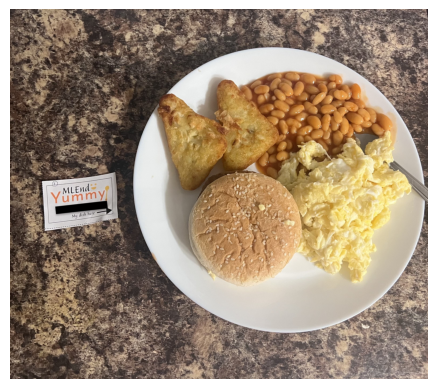

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Replace 'path/to/your/image.jpg' with the actual path to your image file
image_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/002591.jpg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

The Above image referes to the 1st row of model input which is classifed below using the model we built

In [ ]:
y_pred = best_model.predict(first_row)

In [ ]:
#healthiness of the input image 002591.jpg
#predicted score
y_pred

array([4.])

In [ ]:
#healthiness of the input image 002591.jpg

#actual score
y_test[0]

2.0

#9 Conclusions

We have created a feature extaraction and feature reduction transformation and built the model using various classification models, however, the accuracy of the model and confuion matrix says this can be improvised. The scope for improvement in the model, after trying to extract the features from the images such as textre , colour, the model didn't improve by huge number however, the attributes alone from csv file were able to prove better results, so I have only used the csv file in the classification model submission.

The classification results can be improved by extrating more usefulfeatures from images and complex CNN models which directly take images as input and provide classification results better than random forest or linear SVC, however the complexity of CNN architecture needs better understanding of the deep learning modelling